# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import statsmodels.formula.api as sm
import time
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create settings dictionary
dictStgs = {'units': 'imperial', 'appid': api_key}

# Output File (CSV)
strOutput = "output_data/cities.csv"

# Range of latitudes and longitudes
tupLatRng = (-90, 90)
tupLngRng = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lstCoord = []
lstCity = []

# Create a set of random lat and lng combinations
lstLat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lstLng = np.random.uniform(low=-180.000, high=180.000, size=1500)
ltupCoord = zip(lstLat, lstLng)

# Identify nearest city for each lat, lng combination
for tupLatLng in ltupCoord:
    strCity = citipy.nearest_city(tupLatLng[0], tupLatLng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if strCity not in lstCity:
        lstCity.append(strCity)

# Print the city count to confirm sufficient count
len(lstCity)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# check weather in each city
lstCityWthr = []
for i in range(len(lstCity)):
    strCity = lstCity[i]
    try:
        dictResult = owm.get_current(strCity, **dictStgs)
        lstCityWthr.append(dictResult)
        strID = dictResult['id']
        print(f'{str(i).zfill(3)}) Just retrieved weather for {strCity} (ID {strID}).')
    except Exception as e:
        lstCityWthr.append('#N/A')
        print(f'{str(i).zfill(3)}) Couldn\'t retrieve weather for {strCity} ({e}).')

000) Couldn't retrieve weather for tsihombe (HTTP Error 404: Not Found).
001) Just retrieved weather for upernavik (ID 3418910).
002) Just retrieved weather for tiksi (ID 2015306).
003) Just retrieved weather for miles city (ID 5666176).
004) Just retrieved weather for sioux lookout (ID 6148373).
005) Just retrieved weather for ushuaia (ID 3833367).
006) Just retrieved weather for jamestown (ID 2069194).
007) Just retrieved weather for saskylakh (ID 2017155).
008) Just retrieved weather for sena madureira (ID 3662155).
009) Just retrieved weather for alofi (ID 4036284).
010) Couldn't retrieve weather for bengkulu (HTTP Error 404: Not Found).
011) Just retrieved weather for chicama (ID 3698359).
012) Just retrieved weather for karia (ID 2324767).
013) Just retrieved weather for keti bandar (ID 1174451).
014) Just retrieved weather for buritizeiro (ID 3468720).
015) Just retrieved weather for rikitea (ID 4030556).
016) Just retrieved weather for chuy (ID 3443061).
017) Just retrieved wea

144) Just retrieved weather for alice springs (ID 2077895).
145) Just retrieved weather for coolum beach (ID 2170581).
146) Just retrieved weather for avarua (ID 4035715).
147) Just retrieved weather for komsomolskiy (ID 1486910).
148) Just retrieved weather for gunjur (ID 2413419).
149) Just retrieved weather for aklavik (ID 5882953).
150) Couldn't retrieve weather for kazalinsk (HTTP Error 404: Not Found).
151) Just retrieved weather for urucara (ID 3385670).
152) Just retrieved weather for roma (ID 6539761).
153) Couldn't retrieve weather for tarudant (HTTP Error 404: Not Found).
154) Just retrieved weather for merke (ID 1520969).
155) Just retrieved weather for saint george (ID 262462).
156) Just retrieved weather for mahebourg (ID 934322).
157) Couldn't retrieve weather for meyungs (HTTP Error 404: Not Found).
158) Just retrieved weather for launceston (ID 2160517).
159) Couldn't retrieve weather for mocambique (HTTP Error 404: Not Found).
160) Just retrieved weather for ribeira g

286) Just retrieved weather for axim (ID 2303611).
287) Just retrieved weather for namatanai (ID 2090021).
288) Just retrieved weather for prince rupert (ID 6113406).
289) Couldn't retrieve weather for bairiki (HTTP Error 404: Not Found).
290) Just retrieved weather for morros (ID 3398381).
291) Just retrieved weather for svetlogorsk (ID 584051).
292) Just retrieved weather for salair (ID 1493224).
293) Just retrieved weather for shenjiamen (ID 1795632).
294) Just retrieved weather for sitka (ID 4267710).
295) Just retrieved weather for saldanha (ID 2737599).
296) Just retrieved weather for hirara (ID 1862505).
297) Just retrieved weather for merauke (ID 2082539).
298) Just retrieved weather for jijiga (ID 333795).
299) Just retrieved weather for bethel (ID 5880568).
300) Just retrieved weather for san ignacio (ID 3692529).
301) Just retrieved weather for burnie (ID 2173125).
302) Just retrieved weather for lucea (ID 3489657).
303) Just retrieved weather for zhuhai (ID 2052479).
304) J

434) Just retrieved weather for tiznit (ID 2527089).
435) Just retrieved weather for adrar (ID 2508813).
436) Just retrieved weather for byron bay (ID 2172880).
437) Just retrieved weather for benghazi (ID 88319).
438) Just retrieved weather for hervey bay (ID 2146219).
439) Just retrieved weather for abha (ID 110690).
440) Just retrieved weather for coswig (ID 2939820).
441) Just retrieved weather for smithers (ID 6149996).
442) Couldn't retrieve weather for paucartambo (HTTP Error 404: Not Found).
443) Just retrieved weather for caravelas (ID 3466980).
444) Just retrieved weather for klaksvik (ID 2618795).
445) Just retrieved weather for necochea (ID 3430443).
446) Just retrieved weather for kununurra (ID 2068110).
447) Couldn't retrieve weather for vaitupu (HTTP Error 404: Not Found).
448) Just retrieved weather for exu (ID 3400541).
449) Just retrieved weather for mosetse (ID 933277).
450) Just retrieved weather for bishop auckland (ID 2655583).
451) Just retrieved weather for acto

581) Just retrieved weather for sur (ID 286245).
582) Just retrieved weather for san antonio (ID 3872395).
583) Couldn't retrieve weather for samusu (HTTP Error 404: Not Found).
584) Just retrieved weather for krasnorechenskiy (ID 2021613).
585) Just retrieved weather for pueblo bello (ID 3669087).
586) Couldn't retrieve weather for jujuy (HTTP Error 404: Not Found).
587) Just retrieved weather for bontang (ID 1648186).
588) Couldn't retrieve weather for rawah (HTTP Error 404: Not Found).
589) Just retrieved weather for bay roberts (ID 5895424).
590) Just retrieved weather for iqaluit (ID 5983720).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create & populate dataframe
dfCityWthr = pd.DataFrame(columns=['ID', 'Name', 'Country', 'Lat', 'Lng', 'CurrCond', \
                                   'TempF', 'Hum', 'Cloud', 'WindSpd', 'DateTime'])
i = 0
for var in lstCityWthr:
    if var != '#N/A':
        dfCityWthr.loc[i] = [var['id'], var['name'], var['sys']['country'], var['coord']['lat'], \
                             var['coord']['lon'], var['weather'][0]['main'], var['main']['temp'], \
                             var['main']['humidity'], var['clouds']['all'], var['wind']['speed'], \
                             var['dt']]
        i += 1

In [5]:
# inspect dataframe
dfCityWthr.head()

,ID,Name,Country,Lat,Lng,CurrCond,TempF,Hum,Cloud,WindSpd,DateTime
0,3418910,Upernavik,GL,72.79,-56.15,Clouds,39.98,80,33,9.40,1562139791
1,2015306,Tiksi,RU,71.64,128.87,Rain,39.08,87,100,9.26,1562139792
2,5666176,Miles City,US,46.41,-105.84,Clouds,56.61,82,20,8.05,1562139793
3,6148373,Sioux Lookout,CA,50.10,-91.92,Clear,63.66,59,5,3.36,1562139661
4,3833367,Ushuaia,AR,-54.81,-68.31,Clear,26.60,86,0,5.82,1562139794


In [6]:
# drop NAs
dfCityWthr = dfCityWthr.dropna(how='any')

In [7]:
# change Hum and Cloud to float
for ind, val in enumerate(dfCityWthr['Cloud']):
    dfCityWthr.loc[ind, 'Cloud'] = float(val)
for ind, val in enumerate(dfCityWthr['Hum']):
    dfCityWthr.loc[ind, 'Hum'] = float(val)

In [8]:
# compute Distance from Equator (mi) (see http://bit.ly/latitudetomiles)
dfCityWthr['EqtrDist'] = abs(dfCityWthr['Lat']) * 69.2

In [9]:
# save dataframe
dfCityWthr.to_csv('City Weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# define a function to generate the graphs
def Plotter(strTitle='Latitude vs Temperature', strFile='Lat vs Temp.png', \
            strXLbl='Latitude (Degrees)', strYLbl='Temperature (°F)', \
            strX='Lat', strY='TempF', \
            intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
            intYBound1=20, intYBound2=32, intYBound3=80, intYBound4=120, \
            strColLow='blue', strColMid='green', strColHi='red', df=dfCityWthr):
    # create Low, Mid, Hi lists of X and Y vals:
    lstLowX = df.loc[df[strY] < intYBound2][strX]
    lstLowY = df.loc[df[strY] < intYBound2][strY]
    lstMidX = df.loc[(df[strY] >= intYBound2) & (df[strY] < intYBound3)][strX]
    lstMidY = df.loc[(df[strY] >= intYBound2) & (df[strY] < intYBound3)][strY]
    lstHiX  = df.loc[df[strY] >= intYBound3][strX]
    lstHiY  = df.loc[df[strY] >= intYBound3][strY]
    # create scatterplot
    plt.scatter(lstLowX, lstLowY, marker='o', facecolors=strColLow, alpha=0.75)
    plt.scatter(lstMidX, lstMidY, marker='o', facecolors=strColMid, alpha=0.75)
    plt.scatter(lstHiX, lstHiY, marker='o', facecolors=strColHi, alpha=0.75)
    plt.title(f'World Cities: {strTitle}\nAnalysis Started {time.ctime(min(dfCityWthr["DateTime"]))} CT')
    plt.xlabel(strXLbl)
    plt.ylabel(strYLbl)
    plt.xlim(intXBound1, intXBound4)
    plt.ylim(intYBound1, intYBound4)
    plt.grid(axis='both')
    plt.savefig(strFile)

#### Latitude vs. Temperature Plot

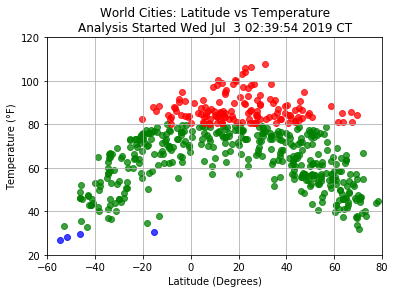

In [11]:
# create Lat vs Temp scatterplot
Plotter()

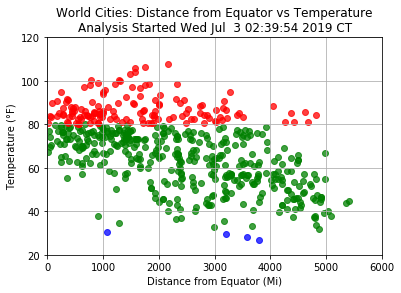

In [12]:
# create Dist vs Temp scatterplot
Plotter(strTitle='Distance from Equator vs Temperature', strFile='Dist vs Temp.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Temperature (°F)', \
        strX='EqtrDist', strY='TempF', \
        intXBound1=0, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=20, intYBound2=32, intYBound3=80, intYBound4=120, \
        strColLow='blue', strColMid='green', strColHi='red', df=dfCityWthr)

In [13]:
# run a regression on distance from equator
ols=sm.ols(formula='TempF~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  TempF   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           8.64e-42
Time:                        02:46:46   Log-Likelihood:                -2139.3
No. Observations:                 534   AIC:                             4283.
Df Residuals:                     532   BIC:                             4291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.7643      1.110     74.582      0.0

#### Latitude vs. Humidity Plot

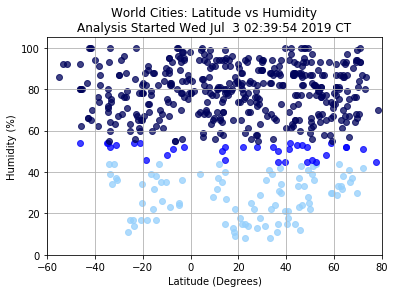

In [14]:
# create Lat vs Hum scatterplot
Plotter(strTitle='Latitude vs Humidity', strFile='Lat vs Hum.png', \
        strXLbl='Latitude (Degrees)', strYLbl='Humidity (%)', \
        strX='Lat', strY='Hum', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=45, intYBound3=55, intYBound4=105, \
        strColLow='xkcd:light blue', strColMid='blue', strColHi='xkcd:dark blue')

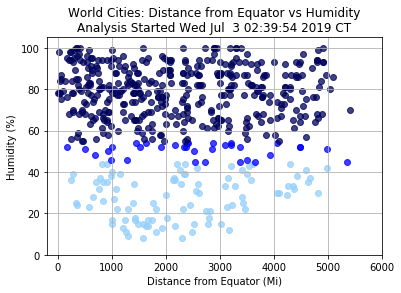

In [15]:
# create Dist vs Hum scatterplot
Plotter(strTitle='Distance from Equator vs Humidity', strFile='Dist vs Hum.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Humidity (%)', \
        strX='EqtrDist', strY='Hum', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=45, intYBound3=55, intYBound4=105, \
        strColLow='xkcd:light blue', strColMid='blue', strColHi='xkcd:dark blue')

In [16]:
# run a regression on distance from equator
ols=sm.ols(formula='Hum~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    Hum   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1574
Date:                Wed, 03 Jul 2019   Prob (F-statistic):              0.692
Time:                        02:46:47   Log-Likelihood:                -2434.6
No. Observations:                 534   AIC:                             4873.
Df Residuals:                     532   BIC:                             4882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.0025      1.929     35.766      0.0

#### Latitude vs. Cloudiness Plot

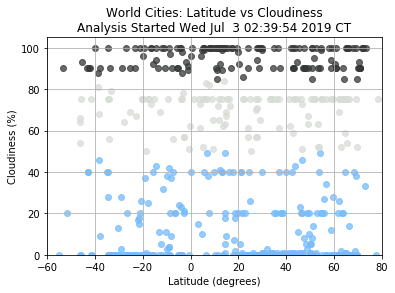

In [17]:
# create Lat vs Cloud scatterplot
# from https://openweathermap.org/weather-conditions : <50% is few/scattered clouds, >85% is overcast
Plotter(strTitle='Latitude vs Cloudiness', strFile='Lat vs Cloud.png', \
        strXLbl='Latitude (degrees)', strYLbl='Cloudiness (%)', \
        strX='Lat', strY='Cloud', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=50, intYBound3=85, intYBound4=105, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

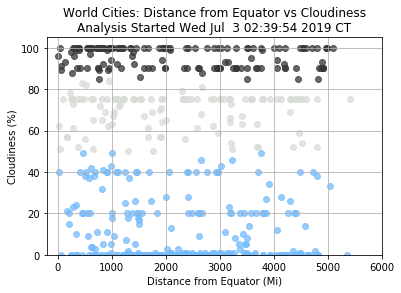

In [18]:
# create Dist vs Cloud scatterplot
# from https://openweathermap.org/weather-conditions : <50% is few/scattered clouds, >85% is overcast
Plotter(strTitle='Distance from Equator vs Cloudiness', strFile='Dist vs Cloud.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Cloudiness (%)', \
        strX='EqtrDist', strY='Cloud', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=50, intYBound3=85, intYBound4=105, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

In [19]:
# run a regression on distance from equator
ols=sm.ols(formula='Cloud~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cloud   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.794
Date:                Wed, 03 Jul 2019   Prob (F-statistic):              0.181
Time:                        02:46:48   Log-Likelihood:                -2721.2
No. Observations:                 534   AIC:                             5446.
Df Residuals:                     532   BIC:                             5455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.7691      3.299     15.085      0.0

#### Latitude vs. Wind Speed Plot

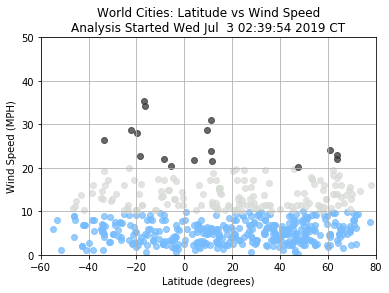

In [20]:
# create Lat vs Wind Speed scatterplot
Plotter(strTitle='Latitude vs Wind Speed', strFile='Lat vs Wind.png', \
        strXLbl='Latitude (degrees)', strYLbl='Wind Speed (MPH)', \
        strX='Lat', strY='WindSpd', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=10, intYBound3=20, intYBound4=50, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

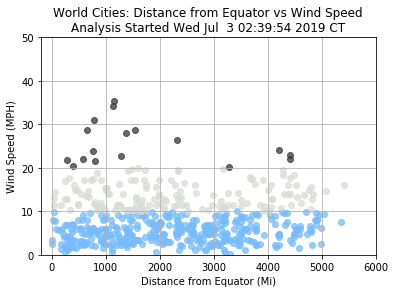

In [21]:
# create Dist vs Wind Speed scatterplot
Plotter(strTitle='Distance from Equator vs Wind Speed', strFile='Dist vs Wind.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Wind Speed (MPH)', \
        strX='EqtrDist', strY='WindSpd', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=10, intYBound3=20, intYBound4=50, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

In [22]:
# run a regression on distance from equator
ols=sm.ols(formula='WindSpd~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                WindSpd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1525
Date:                Wed, 03 Jul 2019   Prob (F-statistic):              0.696
Time:                        02:46:49   Log-Likelihood:                -1672.4
No. Observations:                 534   AIC:                             3349.
Df Residuals:                     532   BIC:                             3357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0685      0.463     17.429      0.0